You only ever need to run these commands the VERY first time.

In [1]:
include("common.jl")

In [2]:
using DataFrames
using Gadfly
using CurveFit
# ignore the warnings

In [16]:
data  = readtable("Matrix_Info");

In [17]:
#Checks for duplicates?
mylist = sort(data[:name])
for i=1:length(mylist)-1
    if mylist[i] == mylist[i+1]
        display(mylist[i])
        display((data[data[:name] .== mylist[i],:]))
    end
end

In [85]:
#Make a list of all the "other" types

#filt = (citation[:subtype] .== "citation")
#filt = (data[:subtype] .== "biology")
#ff = citation[filt,:]
#sum(filt)

6×29 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ clust_alpha │ clust_p │
├─────┼──────┼───────────┼────────┼──────────┼─────────────┼─────────┤
│ 1   │ 630  │ 3.90243   │ 0.8196 │ 5.96936  │ 2.61493     │ 0.0     │
│ 2   │ 636  │ 3.9546    │ 0.8272 │ 6.94975  │ 2.67097     │ 0.0     │
│ 3   │ 639  │ 3.95191   │ 0.8308 │ 7.90299  │ 3.06668     │ 0.0     │
│ 4   │ 641  │ 4.67492   │ 0.9832 │ 5.56574  │ 2.17889     │ 0.0     │
│ 5   │ 643  │ 3.65044   │ 0.8004 │ 6.08367  │ 2.65395     │ 0.0     │
│ 6   │ 1473 │ 5.78396   │ 0.9748 │ 7.20252  │ 1.95617     │ 0.0     │

│ Row │ clust_xmin │ deg_alpha │ deg_p  │ deg_xmin │ lap_alpha │ lap_p  │
├─────┼────────────┼───────────┼────────┼──────────┼───────────┼────────┤
│ 1   │ 0.26667    │ 2.7316    │ 0.3856 │ 13.0     │ 2.66616   │ 0.8444 │
│ 2   │ 0.28571    │ 2.66347   │ 0.0556 │ 8.0      │ 2.63319   │ 0.2316 │
│ 3   │ 0.29825    │ 2.8707    │ 0.0004 │ 23.0     │ 2.93674   │ 0.0008 │
│ 4   │ 0.12727    │ 3.49176   │ 0.894  │ 17.0     │ 3.59821   │ 0.9448 │
│ 5   │ 0.28571    │ 2.7661    │ 0.9328 │ 21.0     │ 2.77489   │ 0.9452 │
│ 6   │ 0.06593    │ 5.18407   │ 0.642  │ 49.0     │ 5.06909   │ 0.546  │

│ Row │ lap_xmin │ largest_eig │ largest_lap_eig │ max_deg │
├─────┼──────────┼─────────────┼─────────────────┼─────────┤
│ 1   │ 12.6706  │ 28.6537     │ 233.049         │ 232.0   │
│ 2   │ 7.81513  │ 32.8198     │ 741.008         │ 740.0   │
│ 3   │ 26.7823  │ 48.9984     │ 332.142         │ 331.0   │
│ 4   │ 19.5005  │ 20.4792     │ 165.098         │ 164.0   │
│ 5   │ 21.9327  │ 43.5646     │ 1104.01         │ 1103.0  │
│ 6   │ 41.3993  │ 29.8989     │ 213.123         │ 212.0   │

│ Row │ name               │ remaining_adj_eigs │ remaining_degs │
├─────┼────────────────────┼────────────────────┼────────────────┤
│ 1   │ "SmaGri-wcc"       │ 32.0               │ 186.0          │
│ 2   │ "Kohonen-wcc"      │ 55.0               │ 713.0          │
│ 3   │ "Zewail-wcc"       │ 213.0              │ 1342.0         │
│ 4   │ "SciMet-wcc"       │ 88.0               │ 252.0          │
│ 5   │ "Lederberg-wcc"    │ 250.0              │ 769.0          │
│ 6   │ "patents_main-wcc" │ 1177.0             │ 352.0          │

│ Row │ remaining_lap_eigs │ resample_alpha │ resample_lap_alpha │
├─────┼────────────────────┼────────────────┼────────────────────┤
│ 1   │ 207.0              │ NA             │ NA                 │
│ 2   │ 848.0              │ NA             │ NA                 │
│ 3   │ 1112.0             │ 9.19519        │ 2.94793            │
│ 4   │ 221.0              │ 7.6343         │ 3.56864            │
│ 5   │ 785.0              │ 4.13964        │ 2.78039            │
│ 6   │ 794.0              │ NA             │ NA                 │

│ Row │ resample_lap_p │ resample_lap_xmin │ resample_p │ resample_xmin │
├─────┼────────────────┼───────────────────┼────────────┼───────────────┤
│ 1   │ NA             │ NA                │ NA         │ NA            │
│ 2   │ NA             │ NA                │ NA         │ NA            │
│ 3   │ 0.0016         │ 28.394            │ 0.312      │ 12.8844       │
│ 4   │ 0.9832         │ 18.9865           │ 0.9528     │ 7.8381        │
│ 5   │ 0.9696         │ 21.3914           │ 0.5416     │ 6.88113       │
│ 6   │ NA             │ NA                │ NA         │ NA            │

│ Row │ size     │ subtype    │ types   │
├─────┼──────────┼────────────┼─────────┤
│ 1   │ 1024.0   │ "citation" │ "other" │
│ 2   │ 3704.0   │ "citation" │ "other" │
│ 3   │ 6640.0   │ "citation" │ "other" │
│ 4   │ 2678.0   │ "citation" │ "other" │
│ 5   │ 8212.0   │ "citation" │ "other" │
│ 6   │ 230686.0 │ "citation" │ "other" │

In [12]:
#Find the biggest graphs
filt = map!(x -> x & !isna(x), data[:size] .>=100000) & map!(x -> x & !isna(x), data[:size] .<=500000) & 
map!(x -> x & !isna(x), data[:types] .!= "model") & map!(x -> x & !isna(x), data[:types] .!= "AS")
ff = data[filt,:]

5×29 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ clust_alpha │ clust_p │
├─────┼──────┼───────────┼────────┼──────────┼─────────────┼─────────┤
│ 1   │ 580  │ 2.85622   │ 0.0    │ 6.29611  │ 5.63099     │ 0.0     │
│ 2   │ 1470 │ 11.2147   │ 0.0    │ 2.50065  │ 2.46387     │ 0.0     │
│ 3   │ 1471 │ 3.4813    │ 0.4652 │ 18.7904  │ 3.48768     │ 0.0     │
│ 4   │ 1473 │ 5.78396   │ 0.9748 │ 7.20252  │ 1.95617     │ 0.0     │
│ 5   │ 1474 │ 4.81186   │ 0.9584 │ 13.4055  │ 2.46674     │ 0.0     │

│ Row │ clust_xmin │ deg_alpha │ deg_p  │ deg_xmin │ lap_alpha │ lap_p  │
├─────┼────────────┼───────────┼────────┼──────────┼───────────┼────────┤
│ 1   │ 1.00292    │ 2.15498   │ 0.0    │ 6.0      │ NA        │ NA     │
│ 2   │ 0.13333    │ 19.8836   │ 0.0012 │ 4.0      │ 13.6889   │ 0.0    │
│ 3   │ 0.42857    │ 2.33856   │ 0.648  │ 28.0     │ 2.3354    │ 0.8616 │
│ 4   │ 0.06593    │ 5.18407   │ 0.642  │ 49.0     │ 5.06909   │ 0.546  │
│ 5   │ 0.26508    │ 3.41666   │ 0.0804 │ 72.0     │ 3.43057   │ 0.1516 │

│ Row │ lap_xmin │ largest_eig │ largest_lap_eig │ max_deg │
├─────┼──────────┼─────────────┼─────────────────┼─────────┤
│ 1   │ NA       │ 314.06      │ 10722.0         │ 10721.0 │
│ 2   │ 5.2696   │ 3.91075     │ 8.21876         │ 7.0     │
│ 3   │ 27.5799  │ 492.101     │ 68192.0         │ 68191.0 │
│ 4   │ 41.3993  │ 29.8989     │ 213.123         │ 212.0   │
│ 5   │ 71.7993  │ 109.473     │ 1072.02         │ 1071.0  │

│ Row │ name                │ remaining_adj_eigs │ remaining_degs │
├─────┼─────────────────────┼────────────────────┼────────────────┤
│ 1   │ "web-NotreDame-wcc" │ 5617.0             │ 62350.0        │
│ 2   │ "usroads-cc"        │ 5736.0             │ 231.0          │
│ 3   │ "dico-sym-cc"       │ 534.0              │ 16302.0        │
│ 4   │ "patents_main-wcc"  │ 1177.0             │ 352.0          │
│ 5   │ "itdk0304-cc"       │ 395.0              │ 1162.0         │

│ Row │ remaining_lap_eigs │ resample_alpha │ resample_lap_alpha │
├─────┼────────────────────┼────────────────┼────────────────────┤
│ 1   │ 0.0                │ NA             │ NA                 │
│ 2   │ 12349.0            │ NA             │ NA                 │
│ 3   │ 17074.0            │ NA             │ NA                 │
│ 4   │ 794.0              │ NA             │ NA                 │
│ 5   │ 1234.0             │ NA             │ NA                 │

│ Row │ resample_lap_p │ resample_lap_xmin │ resample_p │ resample_xmin │
├─────┼────────────────┼───────────────────┼────────────┼───────────────┤
│ 1   │ NA             │ NA                │ NA         │ NA            │
│ 2   │ NA             │ NA                │ NA         │ NA            │
│ 3   │ NA             │ NA                │ NA         │ NA            │
│ 4   │ NA             │ NA                │ NA         │ NA            │
│ 5   │ NA             │ NA                │ NA         │ NA            │

│ Row │ size     │ subtype    │ types   │
├─────┼──────────┼────────────┼─────────┤
│ 1   │ 325729.0 │ "Web"      │ "other" │
│ 2   │ 126146.0 │ "Low-dim"  │ "other" │
│ 3   │ 111982.0 │ "Word"     │ "other" │
│ 4   │ 230686.0 │ "Citation" │ "other" │
│ 5   │ 190914.0 │ "Tech."    │ "other" │

In [61]:
filt = map!(x -> x & !isna(x), data[:lap_p] .>=0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) & (data[:types] .!= "model")
ff = data[filt,:]

x0 = 1:400
Gadfly.plot(
layer(ff, x="max_deg", y = "largest_lap_eig", color = "types", Geom.point),
layer(x = 1:5000, y = 0:4999, Geom.line ) ,
Coord.cartesian(xmax = 10000, ymax = 10000)
)
diff = ff[:largest_lap_eig]- ff[:max_deg]
minimum(diff),maximum(diff)

(1.0000197399999706,1.8586669239999765)

In [1]:
filt = map!(x -> x & !isna(x), data[:lap_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) &  
(data[:types] .== "other")
ff = data[filt,:]

LoadError: LoadError: UndefVarError: data not defined
while loading In[1], in expression starting on line 1

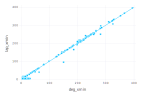

In [45]:
filt = map!(x -> x & !isna(x), data[:lap_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) &  
(data[:types] .!= "model")
ff = data[filt,:]

x0 = range(1,400)
Gadfly.plot(
layer(ff, x="deg_xmin", y = "lap_xmin", Geom.point),
layer(x = 1:400, y = 1:400, Geom.line ) )

#xmin_diff = ff[:deg_xmin] - ff[:lap_xmin]

In [8]:
#List all items which do not have laplacian data
mylist = (data[isna(data[:lap_alpha]),:])

1×29 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ clust_alpha │ clust_p │
├─────┼──────┼───────────┼────────┼──────────┼─────────────┼─────────┤
│ 1   │ 1185 │ 2.97394   │ 0.2048 │ 4.33556  │ 5.63099     │ 0.0     │

│ Row │ clust_xmin │ deg_alpha │ deg_p │ deg_xmin │ lap_alpha │ lap_p │
├─────┼────────────┼───────────┼───────┼──────────┼───────────┼───────┤
│ 1   │ 1.00292    │ 2.15498   │ 0.0   │ 6.0      │ NA        │ NA    │

│ Row │ lap_xmin │ largest_eig │ largest_lap_eig │ max_deg │
├─────┼──────────┼─────────────┼─────────────────┼─────────┤
│ 1   │ NA       │ 185.669     │ 10722.0         │ 10721.0 │

│ Row │ name                │ remaining_adj_eigs │ remaining_degs │
├─────┼─────────────────────┼────────────────────┼────────────────┤
│ 1   │ "web-NotreDame-wcc" │ 7188.0             │ 62350.0        │

│ Row │ remaining_lap_eigs │ resample_alpha │ resample_lap_alpha │
├─────┼────────────────────┼────────────────┼────────────────────┤
│ 1   │ 0.0                │ NA             │ NA                 │

│ Row │ resample_lap_p │ resample_lap_xmin │ resample_p │ resample_xmin │
├─────┼────────────────┼───────────────────┼────────────┼───────────────┤
│ 1   │ NA             │ NA                │ NA         │ NA            │

│ Row │ size     │ subtype │ types   │
├─────┼──────────┼─────────┼─────────┤
│ 1   │ 325729.0 │ "Web"   │ "other" │

In [6]:
lowdim[(lowdim[:adj_p] .>= 0.1),:]

1×29 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p │ adj_xmin │ clust_alpha │ clust_p │
├─────┼──────┼───────────┼───────┼──────────┼─────────────┼─────────┤
│ 1   │ 1466 │ 4.7787    │ 0.998 │ 7.20907  │ 1.64746     │ 0.0     │

│ Row │ clust_xmin │ deg_alpha │ deg_p  │ deg_xmin │ lap_alpha │ lap_p  │
├─────┼────────────┼───────────┼────────┼──────────┼───────────┼────────┤
│ 1   │ 0.13793    │ 2.45178   │ 0.0332 │ 6.0      │ 2.60383   │ 0.0228 │

│ Row │ lap_xmin │ largest_eig │ largest_lap_eig │ max_deg │ name      │
├─────┼──────────┼─────────────┼─────────────────┼─────────┼───────────┤
│ 1   │ 9.38008  │ 29.0263     │ 103.344         │ 102.0   │ "geom-cc" │

│ Row │ remaining_adj_eigs │ remaining_degs │ remaining_lap_eigs │
├─────┼────────────────────┼────────────────┼────────────────────┤
│ 1   │ 40.0               │ 696.0          │ 462.0              │

│ Row │ resample_alpha │ resample_lap_alpha │ resample_lap_p │
├─────┼────────────────┼────────────────────┼────────────────┤
│ 1   │ 4.0678         │ 2.48887            │ 0.012          │

│ Row │ resample_lap_xmin │ resample_p │ resample_xmin │ size   │ subtype   │
├─────┼───────────────────┼────────────┼───────────────┼────────┼───────────┤
│ 1   │ 6.5873            │ 0.0012     │ 4.42841       │ 3621.0 │ "Low-dim" │

│ Row │ types   │
├─────┼─────────┤
│ 1   │ "other" │

In [18]:
#each type
model = data[(data[:types] .== "model"),:];
facebook = data[(data[:types] .== "Facebook"),:];
other = data[(data[:types] .== "other"),:];
as = data[(data[:types] .== "AS"),:];
oregon = data[(data[:types] .== "Oregon"),:];
p2p = data[(data[:types] .== "P2P"),:];
erdos = data[(data[:types] .== "Erdos"),:];

copy = model[(model[:subtype] .== "Copying"),:];
ff = model[(model[:subtype] .== "Forest fire"),:];
pa = model[(model[:subtype] .== "PA"),:];
rpl = model[(model[:subtype] .== "RPL"),:];

biology = other[(other[:subtype] .== "Biology"),:];
citation = other[(other[:subtype] .== "Citation"),:];
collaboration = other[(other[:subtype] .== "Collab."),:];
fiction = other[(other[:subtype] .== "Fiction"),:];
lowdim = other[(other[:subtype] .== "Low-dim"),:];
relational = other[(other[:subtype] .== "Relational"),:];
social = other[(other[:subtype] .== "Social"),:];
technological = other[(other[:subtype] .== "Tech."),:];
web = other[(other[:subtype] .== "Web"),:];
#web = web[(web[:name] .!= "web-NotreDame-wcc"),:];
word = other[(other[:subtype] .== "Word"),:];


keep_filt = (other[:subtype] .!= "Collab.") & (other[:subtype] .!= "Fiction") & (other[:subtype] .!= "Low-dim") &
(other[:subtype] .!= "Relational") & (other[:subtype] .!= "Tech.")
other_keep = other[keep_filt,:];

In [137]:
web

5×29 DataFrames.DataFrame
│ Row │ x   │ adj_alpha │ adj_p  │ adj_xmin │ clust_alpha │ clust_p │
├─────┼─────┼───────────┼────────┼──────────┼─────────────┼─────────┤
│ 1   │ 133 │ 2.81354   │ 0.2544 │ 2.35413  │ 7.63        │ 0.0     │
│ 2   │ 580 │ 2.85622   │ 0.0    │ 6.29611  │ 5.63099     │ 0.0     │
│ 3   │ 585 │ 4.19144   │ 0.262  │ 8.09601  │ 3.54171     │ 0.0     │
│ 4   │ 631 │ 3.27499   │ 0.0    │ 3.87798  │ 1.61767     │ 0.0     │
│ 5   │ 637 │ 4.5897    │ 0.8428 │ 6.75333  │ 1.46785     │ 0.0     │

│ Row │ clust_xmin │ deg_alpha │ deg_p  │ deg_xmin │ lap_alpha │ lap_p  │
├─────┼────────────┼───────────┼────────┼──────────┼───────────┼────────┤
│ 1   │ 0.88095    │ 2.5944    │ 0.6784 │ 18.0     │ 2.61165   │ 0.8676 │
│ 2   │ 1.00292    │ 2.15498   │ 0.0    │ 6.0      │ NA        │ NA     │
│ 3   │ 0.32533    │ 3.66713   │ 0.5576 │ 79.0     │ 3.69169   │ 0.492  │
│ 4   │ 0.06061    │ 2.4974    │ 0.86   │ 10.0     │ 2.49782   │ 0.9596 │
│ 5   │ 0.02564    │ 3.7846    │ 0.7452 │ 46.0     │ 3.87753   │ 0.8628 │

│ Row │ lap_xmin │ largest_eig │ largest_lap_eig │ max_deg │
├─────┼──────────┼─────────────┼─────────────────┼─────────┤
│ 1   │ 18.5828  │ 39.8213     │ 304.008         │ 303.0   │
│ 2   │ NA       │ 314.06      │ 10722.0         │ 10721.0 │
│ 3   │ 81.3962  │ 74.0845     │ 352.046         │ 351.0   │
│ 4   │ 10.9213  │ 16.9308     │ 176.031         │ 175.0   │
│ 5   │ 47.1591  │ 22.4538     │ 200.035         │ 199.0   │

│ Row │ name                │ remaining_adj_eigs │ remaining_degs │
├─────┼─────────────────────┼────────────────────┼────────────────┤
│ 1   │ "stanford-cs-sym"   │ 249.0              │ 175.0          │
│ 2   │ "web-NotreDame-wcc" │ 5617.0             │ 62350.0        │
│ 3   │ "polblogs-sym-cc"   │ 55.0               │ 104.0          │
│ 4   │ "EPA-wcc"           │ 142.0              │ 314.0          │
│ 5   │ "California-wcc"    │ 80.0               │ 73.0           │

│ Row │ remaining_lap_eigs │ resample_alpha │ resample_lap_alpha │
├─────┼────────────────────┼────────────────┼────────────────────┤
│ 1   │ 181.0              │ 3.41168        │ 2.6048             │
│ 2   │ 0.0                │ NA             │ NA                 │
│ 3   │ 104.0              │ NA             │ NA                 │
│ 4   │ 321.0              │ 3.47004        │ 2.51563            │
│ 5   │ 73.0               │ 6.59942        │ 3.73745            │

│ Row │ resample_lap_p │ resample_lap_xmin │ resample_p │ resample_xmin │
├─────┼────────────────┼───────────────────┼────────────┼───────────────┤
│ 1   │ 0.9448         │ 17.8433           │ 0.108      │ 3.7237        │
│ 2   │ NA             │ NA                │ NA         │ NA            │
│ 3   │ NA             │ NA                │ NA         │ NA            │
│ 4   │ 0.9532         │ 10.5572           │ 0.1796     │ 3.771         │
│ 5   │ 0.9656         │ 44.8209           │ 0.794      │ 8.97011       │

│ Row │ size     │ subtype │ types   │
├─────┼──────────┼─────────┼─────────┤
│ 1   │ 2759.0   │ "Web"   │ "other" │
│ 2   │ 325729.0 │ "Web"   │ "other" │
│ 3   │ 1222.0   │ "Web"   │ "other" │
│ 4   │ 4253.0   │ "Web"   │ "other" │
│ 5   │ 5925.0   │ "Web"   │ "other" │

In [19]:
#Count things

list = ff

deg = list[(list[:deg_p] .>= 0.1), :]

adj = list[(list[:adj_p] .>= 0.1), :]

lap = list[!isna(list[:lap_p]), :]
lap = lap[(lap[:lap_p] .>= 0.1), :]


d_a = deg[(deg[:adj_p] .>= 0.1),:]


d_l = lap[(lap[:deg_p] .>= 0.1),:]

a_l = lap[(lap[:adj_p] .>= 0.1),:]


d_a_l = d_l[(d_l[:adj_p] .>= 0.1),:]


size(list)[1], size(deg)[1], size(adj)[1], size(lap)[1], size(d_a)[1], size(d_l)[1], size(a_l)[1], size(d_a_l)[1]

(188,130,82,135,59,108,60,49)

In [20]:
#MAKES THE BIG TABLE


allrows = [
    (biology, "Biology"),
    (citation, "Citation"),
    (collaboration, "Collab."),
    (fiction, "Fiction"),
    (relational, "Relational"),
    (social, "Social"),
    (technological, "Tech."),
    (web, "Web"),
    (word, "Word"),
    (lowdim, "Low-dim"),
    (facebook, "Facebook"),
    (as, "AS"),
    (p2p, "P2P"),
    (erdos, "Erd\\H{o}s"),
    (oregon, "Oregon"),
    (copy, "Copying"),
    (ff, "Forest fire"),
    (pa, "PA"),
    (rpl, "RPL")
]

function assembleentry(val,denom)
    return "\\makebox[5ex][l]{" * string(val) * "}" *
    "\\makebox[5ex][l]{" * @sprintf("%2i\\%%", round(Int,100*val/denom)) * "}"
end


function printrow(list,name)
    
deg = list[(list[:deg_p] .>= 0.1), :]

adj = list[(list[:adj_p] .>= 0.1), :]

lap = list[!isna(list[:lap_p]), :]
lap = lap[(lap[:lap_p] .>= 0.1), :]


d_a = deg[(deg[:adj_p] .>= 0.1),:]


d_l = lap[(lap[:deg_p] .>= 0.1),:]

a_l = lap[(lap[:adj_p] .>= 0.1),:]


d_a_l = d_l[(d_l[:adj_p] .>= 0.1),:]


    rowstr = name * " & "
    rowstr = rowstr * string(size(list)[1]) * " & "
    
    rowstr = rowstr * assembleentry( size(deg)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(adj)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(lap)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(d_a)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(d_l)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(a_l)[1], size(list)[1] ) * " & "
    rowstr = rowstr * assembleentry( size(d_a_l)[1], size(list)[1] ) 
    
    print(rowstr* " \\\\ \n")

#    print( name * " & " * join(map(x -> string(x),
#      (size(list)[1], 
#      size(deg)[1], size(adj)[1], size(lap)[1], 
#      size(d_a)[1], size(d_l)[1], size(a_l)[1], 
#      size(d_a_l)[1])), " & ")*" \\\\ \n" )

end

for row in allrows[1:19]
    name = row[2]
    list = row[1]
    printrow(list,name)
end



Biology & 6 & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{6}\makebox[5ex][l]{100\%} & \makebox[5ex][l]{5}\makebox[5ex][l]{83\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{5}\makebox[5ex][l]{83\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} \\ 
Citation & 6 & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{6}\makebox[5ex][l]{100\%} & \makebox[5ex][l]{5}\makebox[5ex][l]{83\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} & \makebox[5ex][l]{5}\makebox[5ex][l]{83\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{67\%} \\ 
Collab. & 13 & \makebox[5ex][l]{5}\makebox[5ex][l]{38\%} & \makebox[5ex][l]{8}\makebox[5ex][l]{62\%} & \makebox[5ex][l]{5}\makebox[5ex][l]{38\%} & \makebox[5ex][l]{3}\makebox[5ex][l]{23\%} & \makebox[5ex][l]{4}\makebox[5ex][l]{31\%} & \makebox[5ex][l]{3}\makebox[5ex][l]{23\%} & \makebox[5ex][l]{2}\makebox[5ex][l]{15\%} \\ 
Fiction & 3 & \makebox[5

In [21]:
#MAKES THE SECOND TABLE, WITH PROBABILITIES

allrows = [
    (biology, "Biology"),
    (citation, "Citation"),
    #(collaboration, "Collab."),
    #(fiction, "Fiction"),
    #(relational, "Relational"),
    (social, "Social"),
    #(technological, "Tech."),
    (web, "Web"),
    (word, "Word"),
    (other_keep, "Summary"),
    #(lowdim, "Low-dim"),
    (facebook, "Facebook"),
    (as, "AS"),
    #(p2p, "P2P"),
    #(erdos, "Erd\\H{o}s"),
    (oregon, "Oregon"),
    (copy, "Copying"),
    (ff, "Forest fire"),
    (pa, "PA"),
    (rpl, "RPL")
]


function printrow(list,name)
    
    deg = list[(list[:deg_p] .>= 0.1), :]
    adj = list[(list[:adj_p] .>= 0.1), :]
    lap = list[!isna(list[:lap_p]), :]
    lap = lap[(lap[:lap_p] .>= 0.1), :]


    d_a = deg[(deg[:adj_p] .>= 0.1),:]
    p1 = round(size(d_a)[1]/size(deg)[1],2)
    a_d = adj[(adj[:deg_p] .>= 0.1), :]
    p2 = round(size(a_d)[1]/size(adj)[1],2)
    l_d = deg[!isna(deg[:lap_p]), :]
    l_d = l_d[(l_d[:lap_p] .>= 0.1),:]
    p3 = round(size(l_d)[1]/size(deg)[1],2)
    d_l = lap[(lap[:deg_p] .>= 0.1),:]
    p4 = round(size(d_l)[1]/size(lap)[1],2)
    a_l = adj[!isna(adj[:lap_p]),:]
    a_l = a_l[(a_l[:lap_p] .>= 0.1), :] 
    p5 = round(size(a_l)[1]/size(adj)[1],2)
    l_a = lap[(lap[:adj_p] .>= 0.1),:]
    p6 = round(size(l_a)[1]/size(lap)[1],2)


    print( name * " & " * join(map(x -> string(x),
      (p1, p2, p3, p4, p5, p6)), " & ") *" \\\\ \n" )

end

for row in allrows[1:13]
    name = row[2]
    list = row[1]
    printrow(list,name)
end



Biology & 1.0 & 0.67 & 1.0 & 0.8 & 0.83 & 1.0 \\ 
Citation & 1.0 & 0.67 & 1.0 & 0.8 & 0.83 & 1.0 \\ 
Social & 0.86 & 0.75 & 0.71 & 0.83 & 0.62 & 0.83 \\ 
Web & 0.75 & 0.75 & 1.0 & 1.0 & 0.75 & 0.75 \\ 
Word & 1.0 & 0.56 & 0.8 & 0.57 & 0.67 & 0.86 \\ 
Summary & 0.92 & 0.67 & 0.88 & 0.78 & 0.73 & 0.89 \\ 
Facebook & 0.76 & 0.75 & 0.99 & 0.91 & 0.83 & 0.78 \\ 
AS & 0.99 & 0.97 & 0.99 & 0.97 & 0.99 & 0.99 \\ 
Oregon & 0.87 & 0.81 & 0.73 & 0.92 & 0.69 & 0.92 \\ 
Copying & 0.72 & 0.42 & 0.87 & 0.74 & 0.5 & 0.74 \\ 
Forest fire & 0.45 & 0.72 & 0.83 & 0.8 & 0.73 & 0.44 \\ 
PA & 0.8 & 0.78 & 1.0 & 0.81 & 1.0 & 0.84 \\ 
RPL & 0.88 & 0.94 & 1.0 & 0.94 & 1.0 & 0.89 \\ 


 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in bytestring(::Ptr{UInt8}) at ./deprecated.jl:50
 in format(::Fontconfig.Pattern, ::String) at /Users/nicoleeikmeier/.julia/v0.5/Fontconfig/src/Fontconfig.jl:134
 in match_font(::String, ::Float64) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:53
 in pango_set_font at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:77 [inlined]
 in text_extents(::String, ::Float64, ::String, ::Vararg{String,N}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:143
 in text_extents(::String, ::Measures.Length{:mm,Float64}, ::String, ::Vararg{String,N}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:150
 in render(::Gadfly.Guide.XTicks, ::Gadfly.Theme, ::Gadfly.Aesthetics, ::Bool) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/guide.jl:642
 in #render_prepared#88(::Bool, ::Bool, ::Function, ::Gadfly.Plot, ::Gadfly.Coord.Cartesian, ::Gadfly.Aesthetics, ::Array{

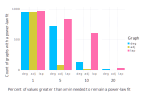

Gadfly.Aesthetics,1}, ::Array{Array{Gadfly.StatisticElement,1},1}, ::Array{Array{Gadfly.Aesthetics,1},1}, ::Array{Array{Gadfly.Data,1},1}, ::Dict{Symbol,Gadfly.ScaleElement}, ::Array{Gadfly.GuideElement,1}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:877
 in (::Gadfly.#kw##render_prepared)(::Array{Any,1}, ::Gadfly.#render_prepared, ::Gadfly.Plot, ::Gadfly.Coord.Cartesian, ::Gadfly.Aesthetics, ::Array{Gadfly.Aesthetics,1}, ::Array{Array{Gadfly.StatisticElement,1},1}, ::Array{Array{Gadfly.Aesthetics,1},1}, ::Array{Array{Gadfly.Data,1},1}, ::Dict{Symbol,Gadfly.ScaleElement}, ::Array{Gadfly.GuideElement,1}) at ./<missing>:0
 in render(::Gadfly.Geom.SubplotGrid, ::Gadfly.Theme, ::Gadfly.Aesthetics, ::Array{Gadfly.Aesthetics,1}, ::Array{Gadfly.Data,1}, ::Dict{Symbol,Gadfly.ScaleElement}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/geom/subplot.jl:348
 in (::Gadfly.##90#92{Dict{Symbol,Gadfly.ScaleElement}})(::Tuple{Gadfly.Layer,Gadfly.Aesthetics,Array{Gadfly.Aesthetics,1},Ar

In [100]:
deg_filt = map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) & (data[:types] .!= "model")
deg_filt = data[deg_filt,:]
adj_filt = map!(x -> x & !isna(x), data[:adj_p] .>= 0.1) & (data[:types] .!= "model")
adj_filt = data[adj_filt, :]
lap_filt = map!(x -> x & !isna(x), data[:lap_p] .>= 0.1) & (data[:types] .!= "model")
lap_filt = data[lap_filt,:]

a = 0.2
b = 0.1
c = 0.05
d = 0.01
deg_a = deg_filt[(deg_filt[:remaining_degs]./deg_filt[:size] .>= a),:]
deg_b = deg_filt[(deg_filt[:remaining_degs]./deg_filt[:size] .>= b),:]
deg_c = deg_filt[(deg_filt[:remaining_degs]./deg_filt[:size] .>= c),:]
deg_d = deg_filt[(deg_filt[:remaining_degs]./deg_filt[:size] .>= d),:]
deg = [size(deg_d)[1], size(deg_c)[1], size(deg_b)[1], size(deg_a)[1]]


adj_a = adj_filt[(adj_filt[:remaining_adj_eigs]./adj_filt[:size] .>= a),:]
adj_b = adj_filt[(adj_filt[:remaining_adj_eigs]./adj_filt[:size] .>= b),:]
adj_c = adj_filt[(adj_filt[:remaining_adj_eigs]./adj_filt[:size] .>= c),:]
adj_d = adj_filt[(adj_filt[:remaining_adj_eigs]./adj_filt[:size] .>= d),:]
adj = [size(adj_d)[1], size(adj_c)[1], size(adj_b)[1], size(adj_a)[1]]

lap_a = lap_filt[(lap_filt[:remaining_lap_eigs]./lap_filt[:size] .>= a),:]
lap_b = lap_filt[(lap_filt[:remaining_lap_eigs]./lap_filt[:size] .>= b),:]
lap_c = lap_filt[(lap_filt[:remaining_lap_eigs]./lap_filt[:size] .>= c),:]
lap_d = lap_filt[(lap_filt[:remaining_lap_eigs]./lap_filt[:size] .>= d),:]
lap = [size(lap_d)[1], size(lap_c)[1], size(lap_b)[1], size(lap_a)[1]]


frame = DataFrame()
frame[:Graph] =["deg", "deg", "deg", "deg", "adj", "adj", "adj", "adj", "lap", "lap", "lap", "lap"]
frame[:data] = [size(deg_d)[1], size(deg_c)[1], size(deg_b)[1], size(deg_a)[1], size(adj_d)[1], size(adj_c)[1], size(adj_b)[1], size(adj_a)[1], size(lap_d)[1], size(lap_c)[1], size(lap_b)[1], size(lap_a)[1]]
frame[:percent] = [1, 5, 10, 20, 1, 5, 10, 20, 1, 5, 10, 20 ]
frame

Gadfly.plot(frame, xgroup = "percent", x = "Graph", y = "data",
color = "Graph",
Guide.xlabel("Percent of values greater than xmin needed to remain a power-law fit"),
Guide.ylabel("Count of graphs with a power-law fit"),
Geom.subplot_grid(Geom.bar(position=:stack)))


In [13]:
#mylist = other[(other[:deg_p] .>= 0.1) & (other[:adj_p] .>= 0.1),:]
#mylist[mylist[:adj_alpha] .>= mylist[:deg_alpha],:]

mylist = model[(model[:adj_p] .>= 0.1),:]
twopointfive = mylist[(mylist[:adj_alpha] .>= 2.5),:]
three = mylist[(mylist[:adj_alpha] .>= 3.0),:]
threepointfive = mylist[(mylist[:adj_alpha] .>= 3.5),:]
@show size(twopointfive), size(three), size(threepointfive)
@show 67/75
myotherlist = facebook[(facebook[:deg_p] .>= 0.1),:]
twopointfive = myotherlist[(myotherlist[:deg_alpha] .>= 2.5),:]
three = myotherlist[(myotherlist[:deg_alpha] .>= 3.0),:]
threepointfive = myotherlist[(myotherlist[:deg_alpha] .>= 3.5),:]
@show size(myotherlist),size(twopointfive), size(three), size(threepointfive)
@show 0/1

#facebooklist = facebook[(facebook[:deg_p] .>= 0.1) & (facebook[:adj_p] .>= 0.1),:]
#facebooklist[facebooklist[:adj_alpha] .>= facebooklist[:deg_alpha],:]

(size(twopointfive),size(three),size(threepointfive)) = ((286,26),(284,26),(267,26))
67 / 75 = 0.8933333333333333
(size(myotherlist),size(twopointfive),size(three),size(threepointfive)) = ((73,26),(73,26),(73,26),(73,26))
0 / 1 = 0.0


0.0

In [11]:
data[(data[:name] .== "Yale4"),:]

0×21 DataFrames.DataFrame

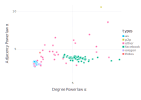

In [55]:
#Plot deg vs adjacency, for all types
filt = map!(x -> x & !isna(x), data[:adj_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) &  
(data[:types] .!= "model")
myplot = Gadfly.plot(data[filt,:], x="deg_alpha",y="adj_alpha", color="types", Guide.xlabel("Degree Powerlaw α" ), 
Guide.ylabel("Adjacency Powerlaw α" ), Coord.Cartesian(xmin=1, ymin=1))

In [63]:
draw(PDF("myplot.pdf", 3.5inch, 3inch), myplot)

In [ ]:
#Draw deg vs lap for type other
#filt = map!(x -> x & !isna(x), data[:lap_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) &  
#(data[:types] .== "other")
#myplot = Gadfly.plot(data[filt,:], x="deg_alpha",y="lap_alpha", Guide.xlabel("Degree Powerlaw α" ), 
#Guide.ylabel("Laplacian Powerlaw α" ), Coord.Cartesian(xmin=1, ymin=1))

filt = data[ (data[:types] .== "other"),:]
filt2 = filt[ !isna(filt[:lap_p]), :]
filt3 = filt2[ ( filt2[:lap_p] .>= 0.1),:]
filt4 = filt3[ (filt3[:deg_p] .>= 0.1), :]

x = filt4[:deg_alpha]

y = filt4[:lap_alpha]

myplot = plot(
layer(x,y, Geom.point),
layer( x=1:10, y = 1:10, Geom.line)
)

#myplot = plot(
#layer( data[filt,:], x="deg_alpha", y="lap_alpha", Geom.point ),
#layer( x=1:10, y = 1:10, Geom.line), 
#Theme(grid_strokedash=[]),
#Guide.xlabel("Degree Powerlaw α" ),
#Guide.ylabel("Laplacian Powerlaw α" )
#)

In [51]:
myplot = plot(
layer( ff, x="deg_alpha", y="lap_alpha", Geom.point ),
layer( x=1:10, y = 1:10, Geom.line), 
Theme(grid_strokedash=[]),
Guide.xlabel("Degree Powerlaw α" ),
Guide.ylabel("Laplacian Powerlaw α" )
)

MethodError: MethodError: no method matching *(::DataArrays.NAtype, ::Measures.Length{:mm,Float64})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
  *(::DataArrays.NAtype) at /Users/nicoleeikmeier/.julia/v0.5/DataArrays/src/operators.jl:322
  *(::DataArrays.NAtype, !Matched::DataArrays.NAtype) at /Users/nicoleeikmeier/.julia/v0.5/DataArrays/src/operators.jl:630
  ...

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of RDatasets
INFO: Use `Pkg.update()` to get the latest versions of your packages


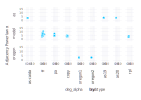

In [49]:
#Pkg.add("RDatasets")
#using RDatasets

filt = map!(x -> x & !isna(x), data[:adj_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1)

tt = data[filt,:];
data_subtype = tt[:subtype];
tokeep = !isna(data_subtype);

ff = tt[tokeep,:];

# dd = dropna(data_subtype)
# tt = dropna(tt);
# @show tt
# filt = filt[!isna(filt[:subtype]),:]
plot(ff,x="deg_alpha",y="adj_alpha",xgroup="subtype",ygroup="types",Geom.subplot_grid(Geom.point),Guide.ylabel("Adjacency Powerlaw α" ))
# plot(dataset("datasets","iris"),x = "SepalLength",y = "SepalWidth",Geom.point)
# plot(data[filt,:],x="deg_alpha",y="adj_alpha",Geom.subplot_grid(Geom.point))
# plot(data[filt,:], xgroup="subtype", x="deg_alpha",y="adj_alpha",Geom.subplot_grid(Geom.point))
# , xgroup="subtype", ygroup="types", 
# Geom.subplot_grid(Geom.point), Guide.ylabel("Adjacency Powerlaw α" ))

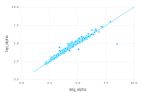

In [54]:
# filt = map!(x -> x & !isna(x), data[:deg_alpha] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) &  (data[:types] .== "other")

filt = map!(x -> x & !isna(x), data[:deg_p] .>= 0.1) & map!(x -> x & !isna(x), data[:lap_p] .>= 0.1)

LL = data[filt,:];
# data_subtype = tt[:subtype];
# tokeep = !isna(data_subtype);

# ff = tt[tokeep,:];
myplot = plot(
layer( LL, x="deg_alpha", y="lap_alpha", Geom.point ),
layer( x=1:10, y = 1:10, Geom.line), 
# Theme(grid_strokedash=[]),
# Guide.xlabel("Degree Powerlaw α" ),
# Guide.ylabel("Laplacian Powerlaw α" )
)

In [25]:
TT = dataset("datasets", "OrchardSprays")

64×4 DataFrames.DataFrame
│ Row │ Decrease │ RowPos │ ColPos │ Treatment │
├─────┼──────────┼────────┼────────┼───────────┤
│ 1   │ 57       │ 1      │ 1      │ "D"       │
│ 2   │ 95       │ 2      │ 1      │ "E"       │
│ 3   │ 8        │ 3      │ 1      │ "B"       │
│ 4   │ 69       │ 4      │ 1      │ "H"       │
│ 5   │ 92       │ 5      │ 1      │ "G"       │
│ 6   │ 90       │ 6      │ 1      │ "F"       │
│ 7   │ 15       │ 7      │ 1      │ "C"       │
│ 8   │ 2        │ 8      │ 1      │ "A"       │
│ 9   │ 84       │ 1      │ 2      │ "C"       │
│ 10  │ 6        │ 2      │ 2      │ "B"       │
│ 11  │ 127      │ 3      │ 2      │ "H"       │
⋮
│ 53  │ 4        │ 5      │ 7      │ "A"       │
│ 54  │ 81       │ 6      │ 7      │ "H"       │
│ 55  │ 20       │ 7      │ 7      │ "D"       │
│ 56  │ 61       │ 8      │ 7      │ "E"       │
│ 57  │ 80       │ 1      │ 8      │ "G"       │
│ 58  │ 114      │ 2      │ 8      │ "F"       │
│ 59  │ 39       │ 3      │ 8      │ "D"       │
│ 60  │ 14       │ 4      │ 8      │ "B"       │
│ 61  │ 86       │ 5      │ 8      │ "H"       │
│ 62  │ 55       │ 6      │ 8      │ "E"       │
│ 63  │ 3        │ 7      │ 8      │ "A"       │
│ 64  │ 19       │ 8      │ 8      │ "C"       │

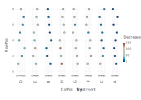

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pointer_to_array(::Ptr{UInt32}, ::Tuple{Int64}, ::Bool) at ./deprecated.jl:50 (repeats 2 times)
 in unpack_pango_attr(::Ptr{Void}, ::Symbol) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:256
 in unpack_pango_attr_list(::Ptr{Void}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:348
 in (::Compose.##155#156{Base.RefValue{Ptr{Void}}})(::Base.AbstractIOBuffer{Array{UInt8,1}}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:386
 in #sprint#304(::Void, ::Function, ::Int64, ::Function) at ./strings/io.jl:37
 in pango_to_svg(::String) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:385
 in draw(::Compose.SVG, ::Compose.TextPrimitive{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}},Compose.Rotation{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}, ::Int64) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/svg.jl:935
 in draw(::Compose.SVG, ::Compose.Form{Compose.

In [21]:
plot(dataset("datasets", "OrchardSprays"),
     xgroup="Treatment", x="ColPos", y="RowPos", color="Decrease",
     Geom.subplot_grid(Geom.point))

In [56]:
tt = data[filt,:];
plot(tt,
     x="deg_alpha",y="adj_alpha",
     Geom.subplot_grid(Geom.point))

ErrorException: The following aesthetics are required by Geom.point but are not defined: y, x


In [57]:
tt = data[filt,:];
# xval = tt[:deg_alpha];
# yval = tt[:adj_alpha];
#@show typeof(tt)
# @show tt
plot(x=xval,y=yval, xgroup="subtype", ygroup="types", Geom.subplot_grid(Geom.point), Guide.ylabel("Adjacency Powerlaw α" ))

LoadError: LoadError: MethodError: no method matching evalmapping(::Void, ::String)
Closest candidates are:
  evalmapping(::Any, !Matched::AbstractArray{T,N}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/mapping.jl:259
  evalmapping(::Any, !Matched::Function) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/mapping.jl:260
  evalmapping(::Any, !Matched::Distributions.Distribution{F<:Distributions.VariateForm,S<:Distributions.ValueSupport}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/mapping.jl:261
  ...
while loading In[57], in expression starting on line 6

In [6]:
size(tt)

(1101,21)

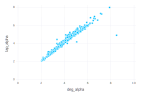

In [59]:
filt = map!(x -> x & !isna(x), data[:lap_p] .>= 0.1) & map!(x -> x & !isna(x), data[:deg_p] .>= 0.1)
plot(data[filt,:], x="deg_alpha",y="lap_alpha")

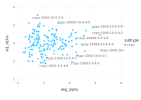

In [60]:
plot(data[(data[:types].=="model") & (data[:subtype].=="copy"),:], 
    x="deg_alpha", y="adj_alpha",color="subtype", label="name", Geom.point, Geom.label)

In [1]:
plot(data[(data[:types].=="facebook") & (data[:lap_p] .>= 0.1),:],x="deg_alpha",y="lap_alpha")

LoadError: LoadError: UndefVarError: plot not defined
while loading In[1], in expression starting on line 1

In [6]:
sigadj = data[data[:adj_p] .>= 0.1,:]
sigadj = sigadj[(sigadj[:types] .== "other") & (sigadj[:adj_alpha] .>= 2.95),:]
@show size(sigadj,1), sum((data[:types] .== "other") & (data[:adj_p] .>= 0.1))
data[(data[:types] .== "other") & (data[:adj_alpha] .< 2.95),:]

(size(sigadj,1),sum((data[:types] .== "other") & (data[:adj_p] .>= 0.1))) = (45,49)


7×21 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ deg_alpha │ deg_p  │ deg_xmin │
├─────┼──────┼───────────┼────────┼──────────┼───────────┼────────┼──────────┤
│ 1   │ 133  │ 2.81354   │ 0.2544 │ 2.35413  │ 2.5944    │ 0.6784 │ 18.0     │
│ 2   │ 137  │ 2.73237   │ 0.958  │ 1.56155  │ 2.62597   │ 0.042  │ 5.0      │
│ 3   │ 139  │ 2.85984   │ 0.9964 │ 3.6497   │ 5.27356   │ 0.5068 │ 39.0     │
│ 4   │ 585  │ 2.72209   │ 0.304  │ 1.44407  │ 2.161     │ 0.1164 │ 2.0      │
│ 5   │ 589  │ 2.22278   │ 0.088  │ 1.0      │ 4.12467   │ 0.9244 │ 10.0     │
│ 6   │ 632  │ 2.72741   │ 0.008  │ 2.13294  │ 2.03728   │ 0.2804 │ 2.0      │
│ 7   │ 1473 │ 2.94471   │ 0.0004 │ 3.69301  │ 4.92412   │ 0.4596 │ 126.0    │

│ Row │ lap_alpha │ lap_p  │ lap_xmin │ largest_eig │ name                 │
├─────┼───────────┼────────┼──────────┼─────────────┼──────────────────────┤
│ 1   │ 2.61165   │ 0.8676 │ 18.5828  │ 39.8213     │ "stanford-cs-sym"    │
│ 2   │ 2.55941   │ 0.3268 │ 4.86649  │ 26.5848     │ "celegans_metabolic" │
│ 3   │ 5.281     │ 0.65   │ 40.1538  │ 40.0274     │ "jazz"               │
│ 4   │ 2.4238    │ 0.4    │ 3.01396  │ 6.7257      │ "karate"             │
│ 5   │ 3.08839   │ 0.0176 │ 6.78336  │ 12.0058     │ "lesmis"             │
│ 6   │ 2.04111   │ 0.5228 │ 3.24294  │ 23.4968     │ "EVA-wcc"            │
│ 7   │ 4.96222   │ 0.6772 │ 126.398  │ 99.3319     │ "arxiv-ubc"          │

│ Row │ resample_alpha │ resample_lap_alpha │ resample_lap_p │
├─────┼────────────────┼────────────────────┼────────────────┤
│ 1   │ 3.41168        │ 2.6048             │ 0.9448         │
│ 2   │ NA             │ NA                 │ NA             │
│ 3   │ NA             │ NA                 │ NA             │
│ 4   │ 5.03542        │ 2.10922            │ 0.1924         │
│ 5   │ 2.39794        │ 3.54717            │ 0.4104         │
│ 6   │ NA             │ NA                 │ NA             │
│ 7   │ NA             │ NA                 │ NA             │

│ Row │ resample_lap_xmin │ resample_p │ resample_xmin │ size    │ subtype │
├─────┼───────────────────┼────────────┼───────────────┼─────────┼─────────┤
│ 1   │ 17.8433           │ 0.108      │ 3.7237        │ 2759.0  │ NA      │
│ 2   │ NA                │ NA         │ NA            │ 453.0   │ NA      │
│ 3   │ NA                │ NA         │ NA            │ 198.0   │ NA      │
│ 4   │ 1.55557           │ 0.7736     │ 2.99078       │ 34.0    │ NA      │
│ 5   │ 9.44729           │ 0.002      │ 1.3097        │ 77.0    │ NA      │
│ 6   │ NA                │ NA         │ NA            │ 4475.0  │ NA      │
│ 7   │ NA                │ NA         │ NA            │ 86376.0 │ NA      │

│ Row │ types   │
├─────┼─────────┤
│ 1   │ "other" │
│ 2   │ "other" │
│ 3   │ "other" │
│ 4   │ "other" │
│ 5   │ "other" │
│ 6   │ "other" │
│ 7   │ "other" │

In [7]:
data[(data[:types] .== "model") & (isna(data[:lap_alpha])),:]

8×21 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ deg_alpha │ deg_p  │ deg_xmin │
├─────┼──────┼───────────┼────────┼──────────┼───────────┼────────┼──────────┤
│ 1   │ 234  │ 8.3548    │ 0.0696 │ 6.44337  │ 5.27831   │ 0.582  │ 14.0     │
│ 2   │ 309  │ 3.96041   │ 0.0    │ 3.5871   │ 4.49671   │ 0.2812 │ 29.0     │
│ 3   │ 348  │ 8.03538   │ 0.1476 │ 5.88805  │ 4.58313   │ 0.0    │ 10.0     │
│ 4   │ 356  │ 4.56789   │ 0.0    │ 2.95133  │ 4.5441    │ 0.0    │ 10.0     │
│ 5   │ 479  │ 5.77289   │ 0.0    │ 4.35203  │ 6.2305    │ 0.8916 │ 17.0     │
│ 6   │ 498  │ 4.52476   │ 0.0    │ 2.91172  │ 5.62709   │ 0.3828 │ 16.0     │
│ 7   │ 554  │ 7.36011   │ 0.0    │ 3.93665  │ 6.65188   │ 0.8264 │ 14.0     │
│ 8   │ 1494 │ 4.26509   │ 0.906  │ 3.784    │ 2.57041   │ 0.4176 │ 1.0      │

│ Row │ lap_alpha │ lap_p │ lap_xmin │ largest_eig │ name                  │
├─────┼───────────┼───────┼──────────┼─────────────┼───────────────────────┤
│ 1   │ NA        │ NA    │ NA       │ 15.0537     │ "ff-100000-10-0.3-1"  │
│ 2   │ NA        │ NA    │ NA       │ 26.5997     │ "ff-100000-2-0.4-1"   │
│ 3   │ NA        │ NA    │ NA       │ 11.4516     │ "ff-50000-2-0.3-3"    │
│ 4   │ NA        │ NA    │ NA       │ 11.7036     │ "ff-50000-2-0.3-4"    │
│ 5   │ NA        │ NA    │ NA       │ 11.5103     │ "ff-50000-2-0.3-5"    │
│ 6   │ NA        │ NA    │ NA       │ 12.3816     │ "ff-50000-2-0.3-1"    │
│ 7   │ NA        │ NA    │ NA       │ 8.18958     │ "ff-100000-2-0.2-1"   │
│ 8   │ NA        │ NA    │ NA       │ 19.9824     │ "rpl-12500-500-2.6-4" │

│ Row │ resample_alpha │ resample_lap_alpha │ resample_lap_p │
├─────┼────────────────┼────────────────────┼────────────────┤
│ 1   │ NA             │ NA                 │ NA             │
│ 2   │ NA             │ NA                 │ NA             │
│ 3   │ NA             │ NA                 │ NA             │
│ 4   │ NA             │ NA                 │ NA             │
│ 5   │ NA             │ NA                 │ NA             │
│ 6   │ NA             │ NA                 │ NA             │
│ 7   │ NA             │ NA                 │ NA             │
│ 8   │ NA             │ NA                 │ NA             │

│ Row │ resample_lap_xmin │ resample_p │ resample_xmin │ size     │ subtype │
├─────┼───────────────────┼────────────┼───────────────┼──────────┼─────────┤
│ 1   │ NA                │ NA         │ NA            │ 100000.0 │ "ff"    │
│ 2   │ NA                │ NA         │ NA            │ 100000.0 │ "ff"    │
│ 3   │ NA                │ NA         │ NA            │ 50000.0  │ "ff"    │
│ 4   │ NA                │ NA         │ NA            │ 50000.0  │ "ff"    │
│ 5   │ NA                │ NA         │ NA            │ 50000.0  │ "ff"    │
│ 6   │ NA                │ NA         │ NA            │ 50000.0  │ "ff"    │
│ 7   │ NA                │ NA         │ NA            │ 100000.0 │ "ff"    │
│ 8   │ NA                │ NA         │ NA            │ 12500.0  │ "rpl"   │

│ Row │ types   │
├─────┼─────────┤
│ 1   │ "model" │
│ 2   │ "model" │
│ 3   │ "model" │
│ 4   │ "model" │
│ 5   │ "model" │
│ 6   │ "model" │
│ 7   │ "model" │
│ 8   │ "model" │

In [8]:
# Figure out why 
data[(data[:types] .== "model") & (data[:subtype] .=="rpl") & (data[:deg_p] .<= 0.1),:]

3×21 DataFrames.DataFrame
│ Row │ x    │ adj_alpha │ adj_p  │ adj_xmin │ deg_alpha │ deg_p  │ deg_xmin │
├─────┼──────┼───────────┼────────┼──────────┼───────────┼────────┼──────────┤
│ 1   │ 1481 │ 3.51702   │ 0.9612 │ 3.61456  │ 2.20359   │ 0.04   │ 1.0      │
│ 2   │ 1482 │ 2.28155   │ 0.0    │ 1.27976  │ 1.82282   │ 0.0    │ 1.0      │
│ 3   │ 1485 │ 2.28591   │ 0.0    │ 1.28331  │ 1.83697   │ 0.0136 │ 1.0      │

│ Row │ lap_alpha │ lap_p │ lap_xmin │ largest_eig │ name                  │
├─────┼───────────┼───────┼──────────┼─────────────┼───────────────────────┤
│ 1   │ 2.3249    │ 0.242 │ 3.14328  │ 28.7334     │ "rpl-12500-500-2.2-3" │
│ 2   │ 1.89805   │ 0.0   │ 3.83951  │ 73.9914     │ "rpl-12500-400-1.8-1" │
│ 3   │ 1.8814    │ 0.0   │ 3.33386  │ 75.9189     │ "rpl-12500-400-1.8-2" │

│ Row │ resample_alpha │ resample_lap_alpha │ resample_lap_p │
├─────┼────────────────┼────────────────────┼────────────────┤
│ 1   │ NA             │ NA                 │ NA             │
│ 2   │ NA             │ NA                 │ NA             │
│ 3   │ NA             │ NA                 │ NA             │

│ Row │ resample_lap_xmin │ resample_p │ resample_xmin │ size    │ subtype │
├─────┼───────────────────┼────────────┼───────────────┼─────────┼─────────┤
│ 1   │ NA                │ NA         │ NA            │ 12500.0 │ "rpl"   │
│ 2   │ NA                │ NA         │ NA            │ 12500.0 │ "rpl"   │
│ 3   │ NA                │ NA         │ NA            │ 12500.0 │ "rpl"   │

│ Row │ types   │
├─────┼─────────┤
│ 1   │ "model" │
│ 2   │ "model" │
│ 3   │ "model" │

In [ ]:
# this shows we are slightly conservative

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in bytestring(::Ptr{UInt8}) at ./deprecated.jl:50
 in format(::Fontconfig.Pattern, ::String) at /Users/nicoleeikmeier/.julia/v0.5/Fontconfig/src/Fontconfig.jl:134
 in match_font(::String, ::Float64) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:53
 in pango_set_font at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:77 [inlined]
 in max_text_extents(::String, ::Float64, ::String, ::Vararg{String,N}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:120
 in max_text_extents(::String, ::Measures.Length{:mm,Float64}, ::String, ::Vararg{String,N}) at /Users/nicoleeikmeier/.julia/v0.5/Compose/src/pango.jl:137
 in render(::Gadfly.Guide.YLabel, ::Gadfly.Theme, ::Gadfly.Aesthetics) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/guide.jl:989
 in render(::Gadfly.Guide.YLabel, ::Gadfly.Theme, ::Gadfly.Aesthetics, ::Bool) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/guide.jl:50
 in #render_prepared#88(::Bool, ::B

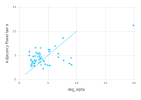

.Aesthetics,1}, ::Array{Array{Gadfly.StatisticElement,1},1}, ::Array{Array{Gadfly.Aesthetics,1},1}, ::Array{Array{Gadfly.Data,1},1}, ::Dict{Symbol,Gadfly.ScaleElement}, ::Array{Gadfly.GuideElement,1}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:877
 in render_prepared(::Gadfly.Plot, ::Gadfly.Coord.Cartesian, ::Gadfly.Aesthetics, ::Array{Gadfly.Aesthetics,1}, ::Array{Array{Gadfly.StatisticElement,1},1}, ::Array{Array{Gadfly.Aesthetics,1},1}, ::Array{Array{Gadfly.Data,1},1}, ::Dict{Symbol,Gadfly.ScaleElement}, ::Array{Gadfly.GuideElement,1}) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:857
 in render(::Gadfly.Plot) at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:803
 in show at /Users/nicoleeikmeier/.julia/v0.5/Gadfly/src/Gadfly.jl:965 [inlined]
 in limitstringmime(::MIME{Symbol("image/svg+xml")}, ::Gadfly.Plot) at /Users/nicoleeikmeier/.julia/v0.5/IJulia/src/execute_request.jl:31
 in display_dict(::Gadfly.Plot) at /Users/nicoleeikmeier/.julia/v0.5/IJ

In [9]:
myplot = plot(
layer(
    data[(data[:types] .== "other") ,:], 
x="deg_alpha", y="adj_alpha", Geom.point
), layer(
    x=1:10,
y = 1:10, Geom.line),
    Theme(grid_strokedash=[]), 
    Guide.ylabel("Adjacency Powerlaw α" )
)


In [ ]:
# save the plot
draw(PDF("Paper/images/myplot.pdf", 3.5inch, 3inch), myplot)